<h2 style="color:orange;">Inner Join</h2>

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the data sets
taxi_owners = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/taxi_owners.p")
taxi_veh = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/taxi_vehicles.p")
wards = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/ward.p")
wards_altered = pd.read_csv("C:/Users/RBTG/OneDrive/Desktop/Data science/data/wards_altered.txt")
census = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/census.p")
ridership = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/ridership.p")
cal = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/calendar.p")
licenses = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/licenses.p")
stations = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/stations.p")
zip_demo = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/zip_demo.p")
land_use = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/land_use.p")
movies = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/movies.p")
financials = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/financials.p")
taglines = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/taglines.p")
movie_to_genres = pd.read_pickle("C:/Users/RBTG/OneDrive/Desktop/Data science/data/movie_to_genres.p")
census_altered = pd.read_csv("C:/Users/RBTG/OneDrive/Desktop/Data science/data/census_altered.txt")

In [3]:
# have a look at the data sets
#print(taxi_owners.head(10))
print('')
#print(taxi_veh.head(10))
print(wards_altered.head(10))
print("")
print(census_altered.head(10))


   ward               alderman                            address    zip
0    61     Proco "Joe" Moreno           2058NORTH WESTERN AVENUE  60647
1     2          Brian Hopkins          1400 NORTH ASHLAND AVENUE  60622
2     3             Pat Dowell            5046 SOUTH STATE STREET  60609
3     4       William D. Burns     435 EAST 35TH STREET 1ST FLOOR  60616
4     5     Leslie A. Hairston              2325 EAST 71ST STREET  60649
5     6     Roderick T. Sawyer   8001 S. MARTIN LUTHER KING DRIVE  60619
6     7    Gregory I. Mitchell              2249 EAST 95TH STREET  60617
7     8     Michelle A. Harris    8539 SOUTH COTTAGE GROVE AVENUE  60619
8     9       Anthony A. Beale                34 EAST 112TH PLACE  60628
9    10  Susan Sadlowski Garza           10500 SOUTH EWING AVENUE  60617

   ward  pop_2000  pop_2010 change                                  address  \
0   NaN     52951     56149     6%              2765 WEST SAINT MARY STREET   
1   2.0     54361     55805     3%   

You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.

Since you'll be working with pandas throughout the course, the package will be preloaded for you as pd in each exercise in this course. Also the taxi_owners and taxi_veh DataFrames are loaded for you.

<li>Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh.</li>
<li>Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.</li>
<li>Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.</li>

In [4]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')


In [5]:
# Merge the taxi_owners and taxi_veh tables setting a suffix
taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_own','_veh'))
print(taxi_own_veh.columns)

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')


In [6]:
# Print the value_counts to find the most popular fuel_type
print(taxi_own_veh['fuel_type'].value_counts())

fuel_type
HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: count, dtype: int64


<span style="color:orange;">"Bravo! You correctly merged the two tables together and found out that the most common fuel type for taxis in Chicago are hybrids"</span>

<h2 style="color:orange;">Inner joins and number of rows returned</h2>

All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered, and census_altered. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

In [7]:
print(wards.head(50))
print(wards.columns)

   ward                   alderman                            address    zip
0     1         Proco "Joe" Moreno          2058 NORTH WESTERN AVENUE  60647
1     2              Brian Hopkins         1400 NORTH  ASHLAND AVENUE  60622
2     3                 Pat Dowell            5046 SOUTH STATE STREET  60609
3     4           William D. Burns    435 EAST 35TH STREET, 1ST FLOOR  60616
4     5         Leslie A. Hairston              2325 EAST 71ST STREET  60649
5     6         Roderick T. Sawyer   8001 S. MARTIN LUTHER KING DRIVE  60619
6     7        Gregory I. Mitchell              2249 EAST 95TH STREET  60617
7     8         Michelle A. Harris    8539 SOUTH COTTAGE GROVE AVENUE  60619
8     9           Anthony A. Beale                34 EAST 112TH PLACE  60628
9    10      Susan Sadlowski Garza           10500 SOUTH EWING AVENUE  60617
10   11     Patrick Daley Thompson          3659 SOUTH HALSTED STREET  60609
11   12            George Cardenas           3476 SOUTH ARCHER AVENUE  60608

In [8]:
# Merge the wards and census tables on the ward column
wards_census = wards.merge(census,on='ward')

# Print the shape of wards_census
print('wards_census table shape:', wards_census.shape)


wards_census table shape: (50, 9)


The apply function with lambda checks each value in census_altered['ward']:

If the value is not NaN, it converts it to an integer first (to remove the decimal point) and then to a string.

If the value is NaN, it remains unchanged.

In [9]:
wards_altered['ward'] = wards_altered['ward'].fillna(61).astype(str)
census_altered['ward'] = census_altered['ward'].apply(lambda x: str(int(x)) if not pd.isna(x) else x)
#census_altered['ward'] =census_altered['ward'].astype(int).astype(str)
wards_altered['zip'] =census_altered['zip'].astype(object)


In [10]:
# Print the first few rows of the wards_altered table to view the change 
print(wards_altered[['ward']].head())
print(wards_altered['ward'].unique())
print(census_altered['ward'].unique())
print(wards['ward'].unique())
print(wards['zip'].unique())
wards_altered['ward'] = wards_altered['ward'].str.strip()
census['ward'] = census['ward'].str.strip()

# Try merging again after cleaning
wards_altered_census = wards_altered.merge(census, on='ward')
print('wards_altered_census table shape:', wards_altered_census.shape)

# Merge the wards_altered and census tables on the ward column
#wards_altered_census = wards_altered.merge(census, on='ward')

# Print the shape of wards_altered_census
#print('wards_altered_census table shape:', wards_altered_census.shape)

  ward
0   61
1    2
2    3
3    4
4    5
['61' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50']
[nan '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50']
['60647' '60622' '60609' '60616' '60649' '60619' '60617' '60628' '60608'
 '60629' '60632' '60636' '60652' '60643' '60637' '60620' '60623' '60638'
 '60624' '60612' '60639' '60641' '60614' '60618' '60607' '60651' '60634'


In [11]:
print(census_altered['ward'].unique())
print(wards['ward'].unique())

[nan '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50']
['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50']


In [12]:
# Print the first few rows of the census_altered table to view the change 
print(census_altered[['ward']].head())

# Merge the wards and census_altered tables on the ward column
wards_census_altered = wards.merge(census_altered,on='ward')

# Print the shape of wards_census_altered
print('wards_census_altered table shape:', wards_census_altered.shape)

  ward
0  NaN
1    2
2    3
3    4
4    5
wards_census_altered table shape: (49, 9)


<h2 style="color:orange;">One to one relationship</h2>

In a one-to-one (1:1) relationship between dataframes, each record in one dataframe maps to exactly one record in another dataframe, and vice versa. This is different from a one-to-many or many-to-many relationship where multiple records in one dataframe can map to multiple records in another dataframe.

Here's how you can manage a one-to-one relationship between two dataframes using pandas:

In [13]:
import pandas as pd

# DataFrame 1
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
})

# DataFrame 2
df2 = pd.DataFrame({
    'id': [1, 2, 3],
    'age': [25, 30, 35]
})

# Merge df1 and df2 on 'id'
merged_df = pd.merge(df1, df2, on='id')
print(merged_df)



   id     name  age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35


Ensure Uniqueness: Make sure that the key column(s) used for merging are unique in both dataframes to maintain a true one-to-one relationship.

Join Types: Use different join types (inner, outer, left, right) as needed. An inner join is typically used for one-to-one relationships if you only want records that exist in both dataframes.

<h2 style="color:orange;">One to many relationship</h2>

A one-to-many relationship in dataframes means that one record in one dataframe (the parent) can relate to multiple records in another dataframe (the child). In pandas, this relationship can be managed using the

 merge function, where one dataframe has unique values in the key column, and the other dataframe has duplicate values in the same key column.

 One-to-many relationship: Alice (customer_id = 1) has two orders (order_id = 101 and 103), while Bob and Charlie have one order each.
 
The merge function duplicates the rows from the parent dataframe (customers) based on the number of matching rows in the child dataframe (orders).

In [14]:
import pandas as pd

# Parent DataFrame: Customers
customers = pd.DataFrame({
    'customer_id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
})

# Child DataFrame: Orders (multiple orders per customer)
orders = pd.DataFrame({
    'order_id': [101, 102, 103, 104],
    'customer_id': [1, 2, 1, 3],
    'product': ['Laptop', 'Phone', 'Tablet', 'Monitor']
})

# Merge customers with orders using 'customer_id'
merged_df = pd.merge(customers, orders, on='customer_id')
print(merged_df)

   customer_id     name  order_id  product
0            1    Alice       101   Laptop
1            1    Alice       103   Tablet
2            2      Bob       102    Phone
3            3  Charlie       104  Monitor


<h2 style="color:orange">Join Types</h2>

<h4>Inner Join</h4> 

Only includes rows where the key exists in both dataframes.

<h4>Left Join</h4> 

All rows from the left (parent) dataframe are included, even if there is no match in the right (child) dataframe.

<h4>Right Join</h4> 

All rows from the right (child) dataframe are included, even if there is no match in the left (parent) dataframe.

<h2 style="color:orange">Difference between nunique ( ) and count ( )</h2>

Use .count ( ) to count total non-null values.

Use .nunique ( ) to count distinct values, ignoring duplicates.

In [15]:
import pandas as pd

# Sample data
df = pd.DataFrame({
    'values': [1, 2, 2, None, 3]
})

# Count all non-null values
print("output with count() : " , df['values'].count())  # Output: 4

# Count unique values
print("output with nunique() : ",df['values'].nunique())  # Output: 3



output with count() :  4
output with nunique() :  3


 <h2 style="color:orange">Merging Multiple Dataframes</h2>

 When merging multiple DataFrames in pandas, you can use the pd.merge() function iteratively or use pd.concat() if the DataFrames share the same structure. 
 
 Below are two common approaches for merging multiple DataFrames.

<ol>
<li>Using pd.merge() for Multiple DataFrames</li>
</ol>

    If you have multiple DataFrames that you need to merge based on a common key, you can chain the merge() method.
    Let's assume you have three DataFrames: df1, df2, and df3.

In [16]:
import pandas as pd

# Sample DataFrames
df1 = pd.DataFrame({
    'id': [1, 2, 3],
    'name': ['Alice', 'Bob', 'Charlie']
})

df2 = pd.DataFrame({
    'id': [1, 2, 4],
    'age': [25, 30, 40]
})

df3 = pd.DataFrame({
    'id': [1, 3, 4],
    'city': ['NYC', 'LA', 'Chicago']
})

# Merge df1 with df2 on 'id'
merged_df1 = pd.merge(df1, df2, on='id')
print("merged_df1 : \n\n" ,merged_df1)


# Merge the result with df3 on 'id'
final_merged_df = pd.merge(merged_df1, df3, on='id')
print("")

print(final_merged_df)


merged_df1 : 

    id   name  age
0   1  Alice   25
1   2    Bob   30

   id   name  age city
0   1  Alice   25  NYC


In [17]:
print(ridership)
print(cal)


     station_id  year  month  day  rides
0         40010  2019      1    1    576
1         40010  2019      1    2   1457
2         40010  2019      1    3   1543
3         40010  2019      1    4   1621
4         40010  2019      1    5    719
...         ...   ...    ...  ...    ...
3280      41660  2019     12   27  13898
3281      41660  2019     12   28   9485
3282      41660  2019     12   29   7581
3283      41660  2019     12   30  15332
3284      41660  2019     12   31  13430

[3285 rows x 5 columns]
     year  month  day        day_type
0    2019      1    1  Sunday/Holiday
1    2019      1    2         Weekday
2    2019      1    3         Weekday
3    2019      1    4         Weekday
4    2019      1    5        Saturday
..    ...    ...  ...             ...
360  2019     12   27         Weekday
361  2019     12   28        Saturday
362  2019     12   29  Sunday/Holiday
363  2019     12   30         Weekday
364  2019     12   31         Weekday

[365 rows x 4 columns]


In [18]:
print(stations)

    station_id            station_name                     location
0        40010      Austin-Forest Park      (41.870851, -87.776812)
1        40020             Harlem-Lake      (41.886848, -87.803176)
2        40030            Pulaski-Lake      (41.885412, -87.725404)
3        40040            Quincy/Wells       (41.878723, -87.63374)
4        40050                   Davis       (42.04771, -87.683543)
..         ...                     ...                          ...
139      41660              Lake/State      (41.884809, -87.627813)
140      41670            Conservatory      (41.884904, -87.716523)
141      41680           Oakton-Skokie  (42.02624348, -87.74722084)
142      41690  Cermak-McCormick Place      (41.853115, -87.626402)
143      41700       Washington/Wabash       (41.88322, -87.626189)

[144 rows x 3 columns]


<h3 style="color:orange;">Total riders in a month</h3>

Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system 

on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables 

together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.


Merge the ridership and cal tables together, starting with the ridership table on the left and save the result to the variable ridership_cal. 


In [19]:
# Merge the ridership and cal tables
ridership_cal = ridership.merge(cal,on=['year','month','day'])
print(ridership_cal)

     station_id  year  month  day  rides        day_type
0         40010  2019      1    1    576  Sunday/Holiday
1         40010  2019      1    2   1457         Weekday
2         40010  2019      1    3   1543         Weekday
3         40010  2019      1    4   1621         Weekday
4         40010  2019      1    5    719        Saturday
...         ...   ...    ...  ...    ...             ...
3280      41660  2019     12   27  13898         Weekday
3281      41660  2019     12   28   9485        Saturday
3282      41660  2019     12   29   7581  Sunday/Holiday
3283      41660  2019     12   30  15332         Weekday
3284      41660  2019     12   31  13430         Weekday

[3285 rows x 6 columns]


Extend the previous merge to three tables by also merging the stations table.

In [20]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
            				.merge(stations,on='station_id')
print(ridership_cal_stations)                

     station_id  year  month  day  rides        day_type        station_name  \
0         40010  2019      1    1    576  Sunday/Holiday  Austin-Forest Park   
1         40010  2019      1    2   1457         Weekday  Austin-Forest Park   
2         40010  2019      1    3   1543         Weekday  Austin-Forest Park   
3         40010  2019      1    4   1621         Weekday  Austin-Forest Park   
4         40010  2019      1    5    719        Saturday  Austin-Forest Park   
...         ...   ...    ...  ...    ...             ...                 ...   
3280      41660  2019     12   27  13898         Weekday          Lake/State   
3281      41660  2019     12   28   9485        Saturday          Lake/State   
3282      41660  2019     12   29   7581  Sunday/Holiday          Lake/State   
3283      41660  2019     12   30  15332         Weekday          Lake/State   
3284      41660  2019     12   31  13430         Weekday          Lake/State   

                     location  
0     (

In [21]:
# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] =='Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

140005


In [22]:
filtered_data = ridership_cal_stations[
    (ridership_cal_stations['month'] == 7) &  # Replace 'desired_month' with your value
    (ridership_cal_stations['day_type'] == 'Weekday') &  # Replace with the desired day type
    (ridership_cal_stations['station_name'] == 'Wilson')  # Replace with the station name
]
print(filtered_data.groupby(['month','day_type','station_name']).agg(totalRides=('rides','sum')))

                             totalRides
month day_type station_name            
7     Weekday  Wilson            140005


Awesome work! You merged three DataFrames together, including merging two tables on multiple columns. Once the tables were merged, you filtered and selected just like any other 

DataFrame. Finally, you found out that the Wilson station had 140,005 riders during weekdays in July.

<h3 style="color:orange;">Three table merge</h3>

To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics 

information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the licenses and wards tables with 

this new income-by-zip-code table called zip_demo.

The licenses, wards, and zip_demo DataFrames have been loaded for you.

In [23]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo,on='zip') \
            			.merge(wards,on='ward')

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby('alderman').agg({'income':'median'}))

                             income
alderman                           
Ameya Pawar                 66246.0
Anthony A. Beale            38206.0
Anthony V. Napolitano       82226.0
Ariel E. Reyboras           41307.0
Brendan Reilly             110215.0
Brian Hopkins               87143.0
Carlos Ramirez-Rosa         66246.0
Carrie M. Austin            38206.0
Chris Taliaferro            55566.0
Daniel "Danny" Solis        41226.0
David H. Moore              33304.0
Deborah Mell                66246.0
Debra L. Silverstein        50554.0
Derrick G. Curtis           65770.0
Edward M. Burke             42335.0
Emma M. Mitts               36283.0
George Cardenas             33959.0
Gilbert Villegas            41307.0
Gregory I. Mitchell         24941.0
Harry Osterman              45442.0
Howard B. Brookins, Jr.     33304.0
James Cappleman             79565.0
Jason C. Ervin              41226.0
Joe Moore                   39163.0
John S. Arena               70122.0
Leslie A. Hairston          

<h3 style="color:orange;">One-to-many merge with multiple tables</h3>

In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses.

 However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid 
 
 complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census 
 
 table has population by ward, and the licenses table lists businesses by ward.

The land_use, census, and licenses tables have been loaded for you.

Merge land_use and census on the ward column. Merge the result of this with licenses on the ward column, using the suffix _cen for the left table and _lic for the right table.

 Save this to the variable land_cen_lic.

In [24]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], 
                                             ascending=[False,True,True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

   ward  pop_2010  vacant  account
47    7     51581      19       80
12   20     52372      15      123
1    10     51535      14      130
16   24     54909      13       98
7    16     51954      13      156


Great job putting your new skills into action. You merged multiple tables with varying relationships and added suffixes to make your column names clearer.

 Using your skills, you were able to pull together information from different tables to see that the 7th ward would be a good place to build your goat farm!

<h2 style='color:orange;'>Left Join</h2>

In pandas, you can perform a left join using the merge() function. A left join returns all the rows from the left DataFrame and only the matching rows from the right DataFrame.

Here’s an example of how to perform a left join in pandas:

<li>df1 is the left DataFrame.</li>
<li>df2 is the right DataFrame.</li>
<li>The how='left' argument ensures that all rows from df1 are returned, with matching rows from df2. If there is no match, the result contains NaN values for columns from df2.</li>


In [25]:
# Sample DataFrames
df1 = pd.DataFrame({
    'key': ['A', 'B', 'C', 'D'],
    'value1': [1, 2, 3, 4]
})

df2 = pd.DataFrame({
    'key': ['A', 'B', 'E', 'F'],
    'value2': [5, 6, 7, 8]
})

# Perform left join
result = pd.merge(df1, df2, how='left', on='key')

print(result)


  key  value1  value2
0   A       1     5.0
1   B       2     6.0
2   C       3     NaN
3   D       4     NaN


<h3 style='color:orange;'>Counting missing rows with left join</h3>
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and 

revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the 

financials table.

The movies and financials tables have been loaded for you.

In [26]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print('Missing values are :' ,number_of_missing_fin)

Missing values are : 1574


Great job! You used a left join to find out which rows in the financials table were missing data. When performing a left join, the .merge() method returns a row full of null values for

 columns in the right table if the key column does not have a matching value in both tables. We see that there are at least 1,500 rows missing data. Wow! That sounds like a lot of work.

In [27]:
toy_story = movies[movies['title'].isin(['Toy Story', 'Toy Story 2', 'Toy Story 3'])]

toy_story

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


In [28]:
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [29]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines,on='id',how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)


      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [30]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines,on='id')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


That's fantastic work! If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. 

A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.

In [31]:
import numpy as np
np_2d = np.array([[5,6,1,2,3,4],[4,5,3,2,1,8],[9,10,3,7,6,5]])
print(np.std(np_2d[1,:]))
print(np.array([4,5]) < 6)

2.266911751455907
[ True  True]


<h3 style='color:orange;'>Right join to find unique movies</h3>
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of 

action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the 

movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

The movies, scifi_movies, and action_movies tables have been loaded for you.

In [53]:
scifi_movies=movie_to_genres[movie_to_genres['genre']=='Science Fiction']
action_movies=movie_to_genres[movie_to_genres['genre']=='Action']
print('scifi_movies Data')
print(scifi_movies.head(4))
print('')
print('')
print('action_movies Data')
print(action_movies.head(4))
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))
print("")
print("action_scifi data \n")
print(action_scifi.head(4))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]
print('')
print('the null values of scifi_only are : ')
print(scifi_only.head(3))

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only,left_on='id',right_on='movie_id')

# Print the first few rows and shape of movies_and_scifi_only
movies_and_scifi_only.head(3)


scifi_movies Data
    movie_id            genre
2         11  Science Fiction
17        18  Science Fiction
20        19  Science Fiction
38        38  Science Fiction


action_movies Data
    movie_id   genre
3         11  Action
14        18  Action
25        22  Action
26        24  Action

action_scifi data 

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction

the null values of scifi_only are : 
   movie_id genre_act        genre_sci
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction


Well done, right join to the rescue! You found over 250 action only movies by merging action_movies and scifi_movies using a right join. With this, you were able to find the rows not 
found in the action_movies table. Additionally, you used the left_on and right_on arguments to merge in the movies table. Wow! You are a superhero.

<h3 style='color:orange;'>Popular genres with right join</h3>
What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 

most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To 

complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in 

movie_to_genres it's called movie_id.

The pop_movies and movie_to_genres tables have been loaded for you.

In [60]:
pop_movies = movies.sort_values('popularity',ascending=False)
pop_movies=pop_movies.head(10)
pop_movies

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13
1867,135397,Jurassic World,418.708552,2015-06-09
4375,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
1106,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
4216,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
2614,177572,Big Hero 6,203.734590,2014-10-24


In [61]:
movie_to_genres.head(10)

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure
5,12,Family
6,12,Animation
7,13,Comedy
8,13,Romance
9,13,Drama


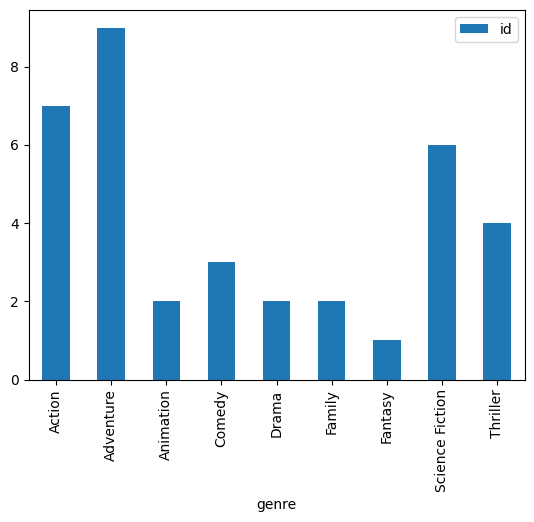

In [62]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

Nice job! The right join ensured that you were analyzing all of the pop_movies. You see from the results that adventure and action are the most popular genres.